# Salary predict

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import preprocessing

##  Load data

In [2]:
df_train = pd.read_csv('train_features.csv')
df_test = pd.read_csv('test_features.csv')
df_salaries = pd.read_csv("train_salaries.csv")["salary"]

# data to submit 
df_test_salaries = df_test['jobId']
# concat
df_all = pd.concat([df_train, df_salaries], axis=1)

## Preprocessing

In [3]:
# drop jobId
df_all = df_all.drop('jobId', axis=1)
df_test = df_test.drop('jobId', axis=1)

# drop  salary = 0
df_all.drop(df_all[df_all['salary']==0].index,inplace=True)

#  drop companyId because no relationship 
df_all = df_all.drop('companyId', axis=1)
df_test = df_test.drop('companyId', axis=1)

# change scale of milesFromMetropolis
df_all['milesFromMetropolis'] = - df_all['milesFromMetropolis']
df_test['milesFromMetropolis'] = - df_test['milesFromMetropolis']

# convert category to one-hot encoding
df_all = pd.get_dummies(df_all, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

In [4]:
# 　Divide yearsExperience  into 5 classes 
df_all['yearsExperience_bins'] = 0
df_all['yearsExperience_bins'][df_all['yearsExperience'] <5] =0
df_all['yearsExperience_bins'][(df_all['yearsExperience'] >=5) & (df_all['yearsExperience'] <10)] =1
df_all['yearsExperience_bins'][(df_all['yearsExperience'] >=10) & (df_all['yearsExperience'] <15)] =2
df_all['yearsExperience_bins'][(df_all['yearsExperience'] >=15) & (df_all['yearsExperience'] <20)] =3
df_all['yearsExperience_bins'][(df_all['yearsExperience'] >=20) & (df_all['yearsExperience'] <25)] =4

df_test['yearsExperience_bins'] = 0
df_test['yearsExperience_bins'][df_test['yearsExperience'] <5] =0
df_test['yearsExperience_bins'][(df_test['yearsExperience'] >=5) & (df_test['yearsExperience'] <10)] =1
df_test['yearsExperience_bins'][(df_test['yearsExperience'] >=10) & (df_test['yearsExperience'] <15)] =2
df_test['yearsExperience_bins'][(df_test['yearsExperience'] >=15) & (df_test['yearsExperience'] <20)] =3
df_test['yearsExperience_bins'][(df_test['yearsExperience'] >=20) & (df_test['yearsExperience'] <25)] =4

/Users/mi-tomoya/.pyenv/versions/3.6.5/envs/ur5/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mi-tomoya/.pyenv/versions/3.6.5/envs/ur5/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/mi-tomoya/.pyenv/versions/3.6.5/envs/ur5/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyd

In [5]:
# min-max normalization for yearsExperience and milesFromMetropolis
df_all['yearsExperience'] = preprocessing.minmax_scale(df_all['yearsExperience'])
df_all['milesFromMetropolis'] = preprocessing.minmax_scale(df_all['milesFromMetropolis'])
df_test['yearsExperience'] = preprocessing.minmax_scale(df_test['yearsExperience'])
df_test['milesFromMetropolis'] = preprocessing.minmax_scale(df_test['milesFromMetropolis'])

/Users/mi-tomoya/.pyenv/versions/3.6.5/envs/ur5/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/Users/mi-tomoya/.pyenv/versions/3.6.5/envs/ur5/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/Users/mi-tomoya/.pyenv/versions/3.6.5/envs/ur5/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/Users/mi-tomoya/.pyenv/versions/3.6.5/envs/ur5/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [6]:
df_all.head(5)

,yearsExperience,milesFromMetropolis,salary,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,...,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience_bins
0,0.416667,0.161616,130,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,2
1,0.125000,0.262626,101,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.416667,0.616162,137,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,2
3,0.333333,0.828283,142,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.333333,0.838384,163,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1


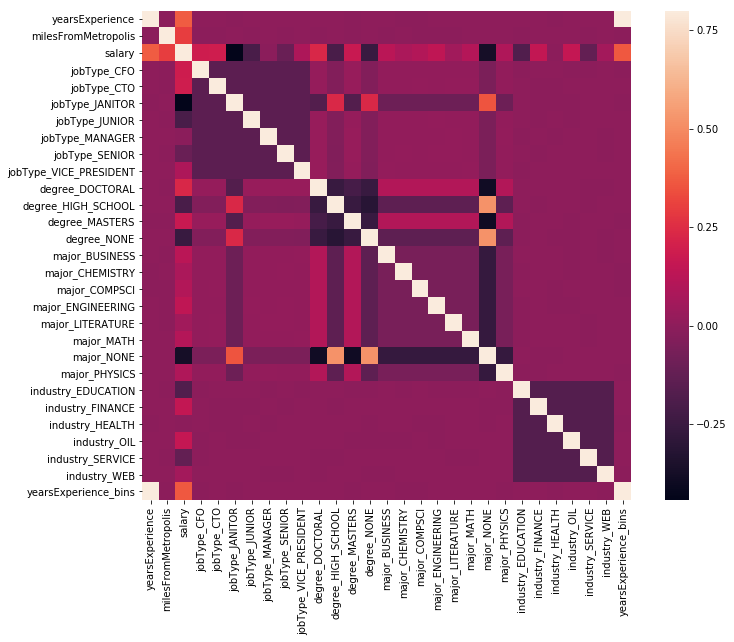

In [7]:
corrmat = df_all.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

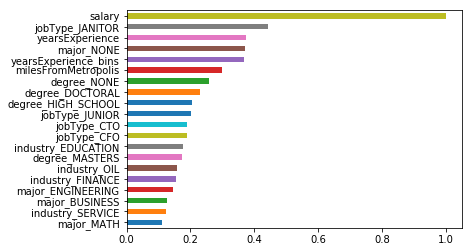

In [8]:
corrmat['salary'] = abs(corrmat['salary'])
ana_list = corrmat['salary'].sort_values().tail(20)
ana_list.plot(kind='barh')

In [9]:
df_x = df_all.drop('salary', axis=1)
df_y = df_all['salary']

In [10]:
# x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, shuffle=True, random_state=42)

## Learn model

In [11]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [12]:
#Validation function
def rmsle_cv(model):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    score = np.sqrt(-cross_val_score(model, df_x, df_y, scoring="neg_mean_squared_error", cv=cv))
   #rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(score)

In [15]:
reg = xgb.XGBRegressor()
reg_cv = GridSearchCV(reg, {'max_depth': [2,4,6], 'max_child_weight': [10,20,30], 'n_estimators': [100, 200, 300]}, verbose=1)
reg_cv.fit(df_x, df_y)
print (reg_cv.best_params_, reg_cv.best_score_)

/Users/mi-tomoya/.pyenv/versions/3.6.5/envs/ur5/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


KeyboardInterrupt: 

In [31]:
# reg_cv.best_params_ = {'max_depth': 6, 'max_child_weight':30,  'n_estimators': 200}
reg = xgb.XGBRegressor(**reg_cv.best_params_) 
reg.fit(df_x, df_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_child_weight=30,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [32]:
score = rmsle_cv(reg)
print("score: {:.4f}\n".format(score.mean()))

score: 18.8937



In [33]:
y_pred = reg.predict(df_test)

In [35]:
df_test_salaries = pd.concat([df_test_salaries, pd.DataFrame({'y_pred' :y_pred})], axis=1)

In [36]:
df_test_salaries.to_csv('test_salaries.csv')